# Buy and Hold

## Import Library

In [15]:
import sys
sys.path.append('../../')

In [16]:

from config.constants import *
from backtesting import Backtest ,Strategy
from util.plot_equity import plot_equity_trades
from util.load_data import load_data
# from BuyAndHold import BuyAndHold
import pandas as pd
from util.Save_result_return import save_to_csv

## Get Data

In [17]:
XAUUSD = load_data()

In [18]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

In [19]:
account_size = 20000

In [20]:
class BuyAndHold(Strategy):

    def init(self):
        pass

    def next(self):
        if not self.position:
            self.buy(size=1)

In [21]:
strategy = BuyAndHold

# Backtest each time frame

## TF D1

In [22]:
Backtest_D1 = Backtest(XAUUSD['D1'], strategy, cash=account_size, margin=1/2000, )
result_D1 = Backtest_D1.run()
result_D1

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                   99.960341
Equity Final [$]                    21192.399
Equity Peak [$]                     21430.149
Return [%]                           5.961995
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                    0.289798
Volatility (Ann.) [%]                1.001202
Sharpe Ratio                          0.28945
Sortino Ratio                        0.395802
Calmar Ratio                         0.071986
Max. Drawdown [%]                    -4.02575
Avg. Drawdown [%]                   -0.202405
Max. Drawdown Duration     3261 days 00:00:00
Avg. Drawdown Duration       79 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     186.595444
Worst Trade [%]                    186.595444
Avg. Trade [%]                    

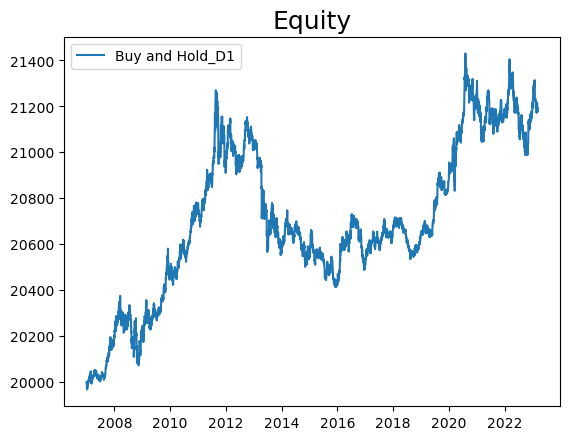

In [23]:
plot_equity_trades(result_D1['_equity_curve'], 'Buy and Hold_D1' , account_size)

### Save output

In [24]:
save_to_csv(result_D1, '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv')  

## TF H4

In [25]:
Backtest_H4 = Backtest(XAUUSD['H4'], strategy,
                       cash=account_size, margin=1/2000, )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                   99.992301
Equity Final [$]                    21227.205
Equity Peak [$]                     21433.398
Return [%]                           6.136025
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                    0.297982
Volatility (Ann.) [%]                1.001683
Sharpe Ratio                         0.297481
Sortino Ratio                        0.407041
Calmar Ratio                          0.07383
Max. Drawdown [%]                   -4.036074
Avg. Drawdown [%]                   -0.105766
Max. Drawdown Duration     3261 days 00:00:00
Avg. Drawdown Duration       31 days 19:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      193.02353
Worst Trade [%]                     193.02353
Avg. Trade [%]                    

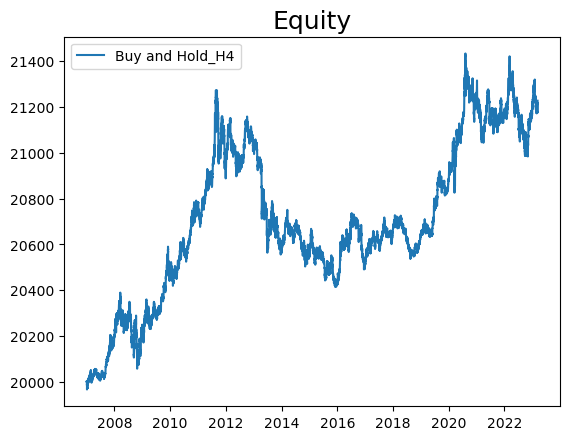

In [26]:
plot_equity_trades(result_H4['_equity_curve'], 'Buy and Hold_H4', account_size)

### Save output

In [27]:
save_to_csv(result_H4,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv')

## TF H1

In [28]:
Backtest_H1 = Backtest(XAUUSD['H1'], strategy,
                       cash=account_size, margin=1/2000, )
result_H1 = Backtest_H1.run()
result_H1

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:00:00
Duration                   5912 days 17:00:00
Exposure Time [%]                   99.997958
Equity Final [$]                     21219.85
Equity Peak [$]                     21434.753
Return [%]                            6.09925
Buy & Hold Return [%]               193.27055
Return (Ann.) [%]                    0.296144
Volatility (Ann.) [%]                1.001407
Sharpe Ratio                         0.295727
Sortino Ratio                        0.404538
Calmar Ratio                         0.072628
Max. Drawdown [%]                   -4.077559
Avg. Drawdown [%]                   -0.068785
Max. Drawdown Duration     3246 days 20:00:00
Avg. Drawdown Duration       16 days 20:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     191.988983
Worst Trade [%]                    191.988983
Avg. Trade [%]                    

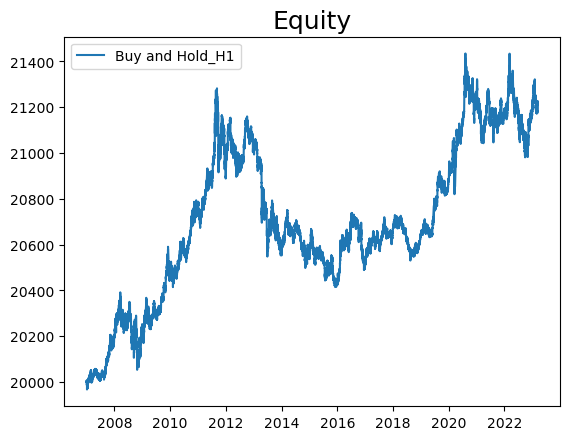

In [29]:
plot_equity_trades(result_H1['_equity_curve'], 'Buy and Hold_H1', account_size)

### Save output

In [30]:
save_to_csv(result_H1,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv')

## TF M30 

In [31]:
Backtest_M30 = Backtest(XAUUSD['M30'], strategy,
                       cash=account_size, margin=1/2000, )
result_M30 = Backtest_M30.run()
result_M30

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:30:00
Duration                   5912 days 17:30:00
Exposure Time [%]                   99.998976
Equity Final [$]                    21226.764
Equity Peak [$]                     21434.344
Return [%]                            6.13382
Buy & Hold Return [%]              193.338852
Return (Ann.) [%]                    0.297879
Volatility (Ann.) [%]                1.001667
Sharpe Ratio                         0.297383
Sortino Ratio                          0.4069
Calmar Ratio                         0.072658
Max. Drawdown [%]                    -4.09974
Avg. Drawdown [%]                   -0.056072
Max. Drawdown Duration     3246 days 19:30:00
Avg. Drawdown Duration       12 days 16:42:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     192.952953
Worst Trade [%]                    192.952953
Avg. Trade [%]                    

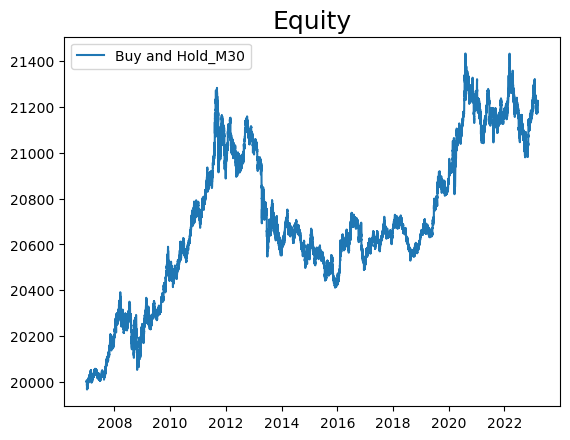

In [32]:
plot_equity_trades(result_M30['_equity_curve'],
                   'Buy and Hold_M30', account_size)

### Save output

In [33]:
save_to_csv(result_M30,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv')

## TF M15 

In [34]:
Backtest_M15 = Backtest(XAUUSD['M15'], strategy,
                       cash=account_size, margin=1/2000, )
result_M15 = Backtest_M15.run()
result_M15

Start                     2014-09-23 13:00:00
End                       2023-03-10 17:45:00
Duration                   3090 days 04:45:00
Exposure Time [%]                      99.999
Equity Final [$]                     20637.46
Equity Peak [$]                     20843.354
Return [%]                             3.1873
Buy & Hold Return [%]               52.062773
Return (Ann.) [%]                    0.303323
Volatility (Ann.) [%]                0.977591
Sharpe Ratio                         0.310276
Sortino Ratio                        0.433294
Calmar Ratio                         0.139394
Max. Drawdown [%]                   -2.176022
Avg. Drawdown [%]                   -0.068571
Max. Drawdown Duration     1078 days 14:45:00
Avg. Drawdown Duration       13 days 06:04:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      51.962301
Worst Trade [%]                     51.962301
Avg. Trade [%]                    

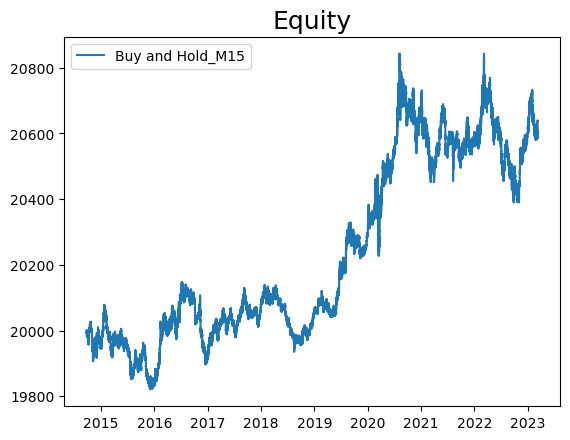

In [35]:
plot_equity_trades(result_M15['_equity_curve'],
                   'Buy and Hold_M15', account_size)

### Save output

In [36]:
save_to_csv(result_M15,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M15.csv')

## TF M5

In [37]:
Backtest_M5 = Backtest(XAUUSD['M5'], strategy,
                       cash=account_size, margin=1/2000, )
result_M5 = Backtest_M5.run()
result_M5

Start                     2020-05-15 11:10:00
End                       2023-03-10 17:55:00
Duration                   1029 days 06:45:00
Exposure Time [%]                      99.999
Equity Final [$]                    20131.107
Equity Peak [$]                     20337.787
Return [%]                           0.655535
Buy & Hold Return [%]                7.487395
Return (Ann.) [%]                     0.17647
Volatility (Ann.) [%]                1.261569
Sharpe Ratio                         0.139882
Sortino Ratio                        0.186092
Calmar Ratio                         0.078778
Max. Drawdown [%]                   -2.240101
Avg. Drawdown [%]                   -0.041564
Max. Drawdown Duration      945 days 19:05:00
Avg. Drawdown Duration        7 days 02:17:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                       7.563016
Worst Trade [%]                      7.563016
Avg. Trade [%]                    

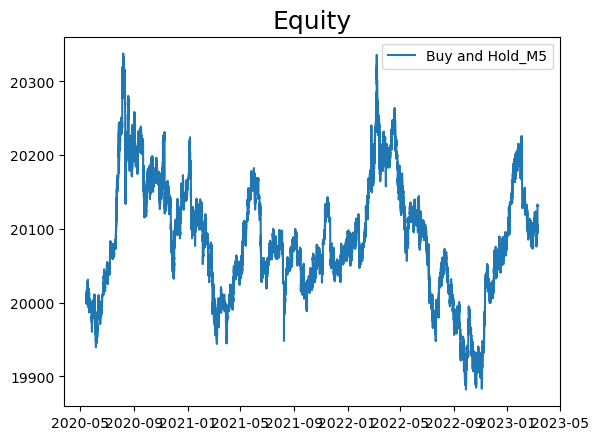

In [38]:
plot_equity_trades(result_M5['_equity_curve'], 'Buy and Hold_M5', account_size)

### Save output

In [39]:
save_to_csv(result_M5,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M5.csv')

## TF M1

In [40]:
Backtest_M1 = Backtest(XAUUSD['M1'], strategy,
                       cash=account_size, margin=1/2000, )
result_M1 = Backtest_M1.run()
result_M1

Start                     2022-08-16 23:13:00
End                       2023-03-10 17:59:00
Duration                    205 days 18:46:00
Exposure Time [%]                      99.999
Equity Final [$]                     20088.37
Equity Peak [$]                     20183.767
Return [%]                            0.44185
Buy & Hold Return [%]                4.977319
Return (Ann.) [%]                    0.634693
Volatility (Ann.) [%]                1.208791
Sharpe Ratio                         0.525064
Sortino Ratio                        0.791995
Calmar Ratio                          0.76012
Max. Drawdown [%]                    -0.83499
Avg. Drawdown [%]                   -0.023518
Max. Drawdown Duration       90 days 01:47:00
Avg. Drawdown Duration        0 days 22:26:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                       4.976663
Worst Trade [%]                      4.976663
Avg. Trade [%]                    

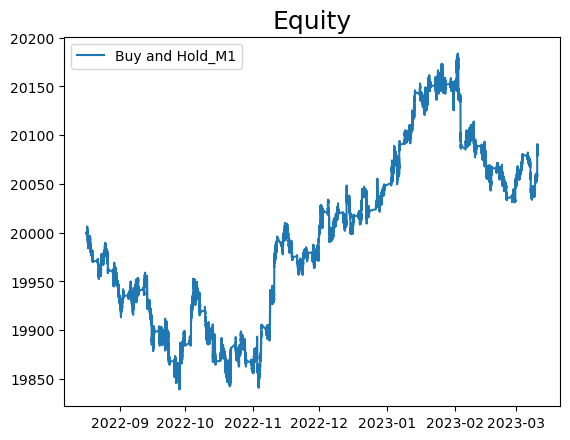

In [41]:
plot_equity_trades(result_M1['_equity_curve'], 'Buy and Hold_M1', account_size)

### Save output

In [42]:
save_to_csv(result_M1,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M1.csv')